# Figure 3

![title](../assets/Fig3.png)

In [11]:
%load_ext autoreload
%autoreload 2

import os
import pickle
import logging
import itertools
from pathlib import Path

import sys
sys.path.insert(0, './prepare_data')
import Figure3_prepare_data as prepare_data

import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp

from common import *

# Disable matplotlib logger
logging.getLogger("matplotlib.font_manager").disabled = True

# Paths
DATA_PATH = Path("../data")
EXPORT_PATH = Path("../results/Figure3")

EXPORT_PATH.mkdir(parents=True, exist_ok=True)

colors_piyg = mcp.gen_color(cmap="PiYG",n=5)

COLOR_BEHAVIORS = {
    "unilateral_t_left": colors_piyg[0],
    "unilateral_nt_left": colors_piyg[1],
    "bilateral": COLORS['grey'],
    "unilateral_nt_right": colors_piyg[3],
    "unilateral_t_right": colors_piyg[4],
    "nc_grooming": COLORS['skyblue'],
    "background": COLORS['yellow'],
}

FIGSIZE = {'width': 1.2, 'length': 0.9}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Panel E: analysis of head-fixed data. 

We look at the coordination between lateral foreleg shift and antennal pitch.

In [12]:
# Load the data
head_fixed_df = load_data(DATA_PATH / "Fig3_kinematics_head_fixed.pkl")

In [15]:
intact_chunks, exp_chunks = prepare_data.prepare_data_panel_e(head_fixed_df)

df_panel_e = prepare_data.boxen_panel_e(intact_chunks, exp_chunks)
fly_data_panel_e = prepare_data.scatter_panel_e(intact_chunks, exp_chunks)

/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97074/3079524082.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


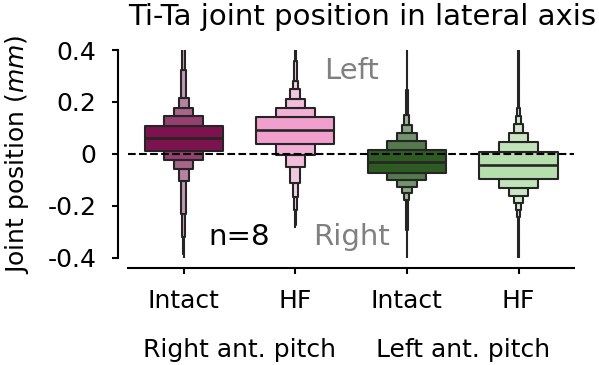

In [16]:
color_behaviors = {
    "Intact R": "#8e0152",
    "Head-fixed R": "#fe92d0",
    # 'space0': '#FFFFFF',
    "Intact L": "#276419",
    "Head-fixed L": "#b0e8a3",
}

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(
        1, 1, figsize=(FIGSIZE["width"] * 1.6, FIGSIZE["length"] * 1.0), dpi=300
    )

    # ax.axvspan(xmin=-0.5, xmax=3.5, ymin=0, ymax=0.5, color="grey", alpha=0.1)
    # ax.axvspan(xmin=-0.5, xmax=3.5, ymin=0.5, ymax=1.0, color="yellow", alpha=0.1)
    sns.boxenplot(
        ax=ax,
        x="label",
        y="lateral_pos",
        data=df_panel_e,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
        # k_depth="proportion",
        # outlier_prop=0.009
    )

    # horizontal line
    ax.axhline(0, color="black", linestyle="--", lw=0.5)

    # label right and grey shaded area
    ax.text(
        0.5,
        0.1,
        "Right",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
        color="grey",
    )
    ax.text(
        0.5,
        0.9,
        "Left",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
        color="grey",
    )

    ax.set_xticks(
        rotation=0,
        ticks=[0, 1, 2, 3],
        labels=["Intact", "HF", "Intact", "HF"],
        minor=False,
    )
    ax.set_xticks(
        rotation=0,
        ticks=[0.5, 2.5],
        labels=["\n\nRight ant. pitch", "\n\nLeft ant. pitch"],
        minor=True,
    )
    # at 0.5 and 2.5 put two labels
    ax.set_ylim(-0.4, 0.4)
    ax.set_yticks(
        rotation=0, ticks=[-0.4, -0.2, 0, 0.2, 0.4], labels=[-0.4, -0.2, 0, 0.2, 0.4]
    )
    plt.tick_params(axis="both", which="minor", length=0)
    ax.set_ylabel("Joint position ($mm$)")
    ax.set_xlabel("")

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis
    ax.set_xlim(-0.5, 3.5)
    plt.title("Ti-Ta joint position in lateral axis", loc="left")
    # lets put some text
    ax.text(
        0.25,
        0.1,
        "n=8",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    fig.savefig(EXPORT_PATH / "Fig3_PanelE_i.png", bbox_inches="tight")
    plt.show()

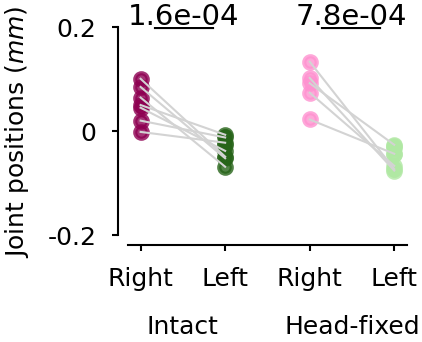

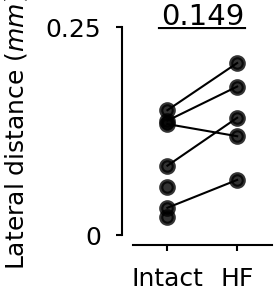

In [17]:
# compare intact right and left
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 1.0, FIGSIZE["length"] * 1.0))
    # plot fly comparison
    for j, lateral_pos in enumerate(
        fly_data_panel_e["intact"]["lateral_pos_ant_r"]
    ):
        ax.scatter(
            0,
            fly_data_panel_e["intact"]["lateral_pos_ant_r"][j],
            c=color_behaviors["Intact R"],
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            fly_data_panel_e["intact"]["lateral_pos_ant_l"][j],
            c=color_behaviors["Intact L"],
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1],
            [
                fly_data_panel_e["intact"]["lateral_pos_ant_r"][j],
                fly_data_panel_e["intact"]["lateral_pos_ant_l"][j],
            ],
            c="lightgrey",
            alpha=1,
        )

    p_value_intact = scipy.stats.mannwhitneyu(
        [
            x
            for x in fly_data_panel_e["intact"]["lateral_pos_ant_r"]
            if not np.isnan(x)
        ],
        [
            x
            for x in fly_data_panel_e["intact"]["lateral_pos_ant_l"]
            if not np.isnan(x)
        ],
        alternative="greater",
    )
    diff_intact = [
        x - y if not np.isnan(x) and not np.isnan(y) else np.nan
        for x, y in zip(
            fly_data_panel_e["intact"]["lateral_pos_ant_r"],
            fly_data_panel_e["intact"]["lateral_pos_ant_l"],
        )
    ]

    # draw a horizontal line between 0 and 1
    ax.axhline(y=0.2, xmin=0.1, xmax=0.3, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.2,
        1.05,
        f"{p_value_intact.pvalue:.1e}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    # plot fly comparison for hf case
    for j, lateral_pos in enumerate(
        fly_data_panel_e["hf"]["lateral_pos_ant_r"]
    ):
        ax.scatter(
            2,
            fly_data_panel_e["hf"]["lateral_pos_ant_r"][j],
            c=color_behaviors["Head-fixed R"],
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            3,
            fly_data_panel_e["hf"]["lateral_pos_ant_l"][j],
            c=color_behaviors["Head-fixed L"],
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [2, 3],
            [
                fly_data_panel_e["hf"]["lateral_pos_ant_r"][j],
                fly_data_panel_e["hf"]["lateral_pos_ant_l"][j],
            ],
            c="lightgrey",
            alpha=1,
        )
    p_value_hf = scipy.stats.mannwhitneyu(
        [
            x
            for x in fly_data_panel_e["hf"]["lateral_pos_ant_r"]
            if not np.isnan(x)
        ],
        [
            x
            for x in fly_data_panel_e["hf"]["lateral_pos_ant_l"]
            if not np.isnan(x)
        ],
        alternative="greater",
    )
    diff_hf = [
        x - y if not np.isnan(x) and not np.isnan(y) else np.nan
        for x, y in zip(
            fly_data_panel_e["hf"]["lateral_pos_ant_r"],
            fly_data_panel_e["hf"]["lateral_pos_ant_l"],
        )
    ]

    # draw a horizontal line between 0 and 1
    ax.axhline(y=0.2, xmin=0.7, xmax=0.9, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.8,
        1.05,
        f"{p_value_hf.pvalue:.1e}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    ax.set_xticks([0, 1, 2, 3], ["Right", "Left", "Right", "Left"], minor=False)
    ax.set_xticks(
        rotation=0,
        ticks=[0.5, 2.5],
        labels=["\n\nIntact", "\n\nHead-fixed"],
        minor=True,
    )
    # dont show minor ticks
    plt.tick_params(axis="both", which="minor", length=0)
    # plt.xlim([-0.5, 1.5])
    plt.yticks([-0.2, 0, 0.2], [-0.2, 0, 0.2])
    plt.ylim([-0.2, 0.2])

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis

    # plt.title(f"{p_value.pvalue:.3f}")
    plt.ylabel("Joint positions ($mm$)")
    fig.savefig(EXPORT_PATH / "Fig3_PanelE_ii_flycomp.png", bbox_inches="tight")

    plt.show()

# compare hf right and left
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 0.5, FIGSIZE["length"] * 1.0))
    # plot fly comparison
    for j, (lateral_pos_int, lateral_pos_hf) in enumerate(zip(diff_intact, diff_hf)):
        ax.scatter(
            0,
            lateral_pos_int,
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            lateral_pos_hf,
            c="black",
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1],
            [
                lateral_pos_int,
                lateral_pos_hf,
            ],
            c="black",
            alpha=1,
        )

    plt.xticks([0, 1], ["Intact", "HF"])
    plt.xlim([-0.5, 1.5])
    plt.yticks([0, 0.25], [0, 0.25])
    plt.ylim([0, 0.25])

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis
    p_value = scipy.stats.mannwhitneyu(
        [x for x in diff_intact if not np.isnan(x)],
        [x for x in diff_hf if not np.isnan(x)],
        alternative="two-sided",
    )

    # draw a horizontal line between 0 and 1
    ax.axhline(y=0.25, xmin=0.2, xmax=0.8, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.5,
        1.05,
        f"{p_value.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    plt.ylabel("Lateral distance ($mm$)")
    fig.savefig(EXPORT_PATH / "Fig3_PanelE_iii_flycomp.png", bbox_inches="tight")

    plt.show()

## Panel F: analysis of foreleg-amputation data. 

We look at the coordination between head rotation and antennal pitch.

In [18]:
fleg_amp_df = load_data(DATA_PATH / "Fig3_kinematics_foreleg_ampu.pkl")

In [22]:
intact_chunks, exp_chunks = prepare_data.prepare_data_panel_f(fleg_amp_df)

df_panel_f = prepare_data.boxen_panel_f(intact_chunks, exp_chunks)
fly_data_panel_f = prepare_data.scatter_panel_f(intact_chunks, exp_chunks)

/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97074/107668223.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


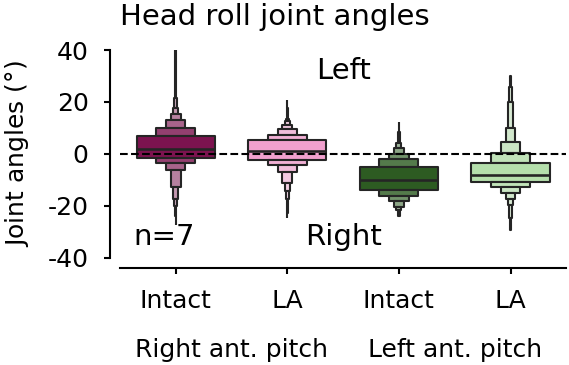

In [23]:
color_behaviors = {
    "Intact R": "#8e0152",
    "RLF R": "#fe92d0",
    # 'space0': '#FFFFFF',
    "Intact L": "#276419",
    "RLF L": "#b0e8a3",
}

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(
        1, 1, figsize=(FIGSIZE["width"] * 1.6, FIGSIZE["length"] * 1.0), dpi=300
    )

    sns.boxenplot(
        ax=ax,
        x="label",
        y="head_roll",
        data=df_panel_f,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )


    # # horizontal line
    ax.axhline(0, color="black", linestyle="--", lw=0.5)

    # label right and grey shaded area
    ax.text(
        0.5,
        0.9,
        "Left",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        0.1,
        "Right",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    ax.set_xticks(
        rotation=0,
        ticks=[0, 1, 2, 3],
        labels=["Intact", "LA", "Intact", "LA"],
        minor=False,
    )
    ax.set_xticks(
        rotation=0,
        ticks=[0.5, 2.5],
        labels=["\n\nRight ant. pitch", "\n\nLeft ant. pitch"],
        minor=True,
    )
    # # at 0.5 and 2.5 put two labels
    ax.set_ylim(-40, 40)
    plt.tick_params(axis="both", which="minor", length=0)
    ax.set_ylabel("Joint angles ($\degree$)")
    ax.set_xlabel("")

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis
    ax.set_xlim(-0.5, 3.5)
    ax.set_yticks(rotation=0, ticks=[-40, -20, 0, 20, 40], labels=[40, 20, 0, -20, -40])
    ax.invert_yaxis()
    plt.title("Head roll joint angles", loc='left')
    ax.text(
        0.1,
        0.1,
        "n=7",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    fig.savefig(EXPORT_PATH / "Fig3_PanelG_i.png", bbox_inches="tight")
    plt.show()

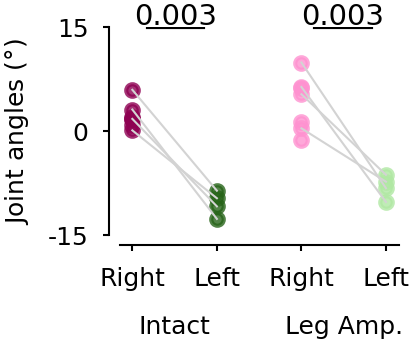

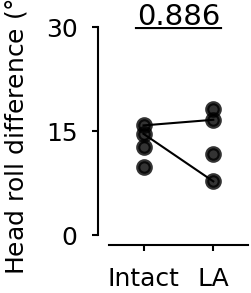

In [24]:
color_behaviors = {
    "Intact R": "#8e0152",
    "RLF R": "#fe92d0",
    # 'space0': '#FFFFFF',
    "Intact L": "#276419",
    "RLF L": "#b0e8a3",
}

# compare intact right and left
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 1.0, FIGSIZE["length"] * 1.))
    # plot fly comparison
    for j, head_angle in enumerate(
        fly_data_panel_f["intact"]["head_roll_ant_r"]
    ):
        ax.scatter(
            0,
            fly_data_panel_f["intact"]["head_roll_ant_r"][j],
            c=color_behaviors["Intact R"],
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            fly_data_panel_f["intact"]["head_roll_ant_l"][j],
            c=color_behaviors["Intact L"],
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1],
            [
                fly_data_panel_f["intact"]["head_roll_ant_r"][j],
                fly_data_panel_f["intact"]["head_roll_ant_l"][j],
            ],
            c="lightgrey",
            alpha=1,
        )

    p_value_intact = scipy.stats.mannwhitneyu(
        [
            x
            for x in fly_data_panel_f["intact"]["head_roll_ant_r"]
            if not np.isnan(x)
        ],
        [
            x
            for x in fly_data_panel_f["intact"]["head_roll_ant_l"]
            if not np.isnan(x)
        ],
        alternative="less",
    )
    diff_intact = [
        y - x
        if not np.isnan(x) and not np.isnan(y)
        else np.nan
        for x, y in zip(
            fly_data_panel_f["intact"]["head_roll_ant_r"],
            fly_data_panel_f["intact"]["head_roll_ant_l"],
        )
    ]

    # draw a horizontal line between 0 and 1
    ax.axhline(y=-15, xmin=0.1, xmax=0.3, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.2,
        1.05,
        f"{p_value_intact.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    # plot fly comparison for rlf case
    for j, head_angle in enumerate(
        fly_data_panel_f["rlf"]["head_roll_ant_r"]
    ):
        ax.scatter(
            2,
            fly_data_panel_f["rlf"]["head_roll_ant_r"][j],
            c=color_behaviors["RLF R"],
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            3,
            fly_data_panel_f["rlf"]["head_roll_ant_l"][j],
            c=color_behaviors["RLF L"],
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [2, 3],
            [
                fly_data_panel_f["rlf"]["head_roll_ant_r"][j],
                fly_data_panel_f["rlf"]["head_roll_ant_l"][j],
            ],
            c="lightgrey",
            alpha=1,
        )
    p_value_rlf = scipy.stats.mannwhitneyu(
        [
            x
            for x in fly_data_panel_f["rlf"]["head_roll_ant_r"]
            if not np.isnan(x)
        ],
        [
            x
            for x in fly_data_panel_f["rlf"]["head_roll_ant_l"]
            if not np.isnan(x)
        ],
        alternative="less",
    )
    diff_rlf = [
        y - x
        if not np.isnan(x) and not np.isnan(y)
        else np.nan
        for x, y in zip(
            fly_data_panel_f["rlf"]["head_roll_ant_r"],
            fly_data_panel_f["rlf"]["head_roll_ant_l"],
        )
    ]

    # draw a horizontal line between 0 and 1
    ax.axhline(y=-15, xmin=0.7, xmax=0.9, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.8,
        1.05,
        f"{p_value_rlf.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    ax.set_xticks([0, 1, 2, 3], ["Right", "Left", "Right", "Left"], minor=False)
    ax.set_xticks(
        rotation=0,
        ticks=[0.5, 2.5],
        labels=["\n\nIntact", "\n\nLeg Amp."],
        minor=True,
    )
    # dont show minor ticks
    plt.tick_params(axis="both", which="minor", length=0)
    # plt.xlim([-0.5, 1.5])
    plt.yticks([-15, 0, 15], [15, 0, -15])
    plt.ylim([-15, 15])
    ax.invert_yaxis()
    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis

    # plt.title(f"{p_value.pvalue:.3f}")
    plt.ylabel("Joint angles ($\degree$)")
    fig.savefig(EXPORT_PATH / "Fig3_PanelG_ii_flycomp.png", bbox_inches="tight")

    plt.show()
# compare hf right and left
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 0.5, FIGSIZE["length"] * 1.))
    # plot fly comparison
    for j, (head_roll_int, head_roll_rlf) in enumerate(
        zip(diff_intact, diff_rlf)
    ):
        ax.scatter(
            0,
            head_roll_int,
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            head_roll_rlf,
            c="black",
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1],
            [
                head_roll_int,
                head_roll_rlf,
            ],
            c="black",
            alpha=1,
        )

    plt.xticks([0, 1], ["Intact", "LA"])
    plt.xlim([-0.5, 1.5])
    plt.yticks([0, 15, 30], [0, 15, 30])
    plt.ylim([0, 30])

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis
    p_value = scipy.stats.mannwhitneyu(
        [
            x
            for x in diff_intact
            if not np.isnan(x)
        ],
        [
            x
            for x in diff_rlf
            if not np.isnan(x)
        ],
        alternative="two-sided",
    )

    # draw a horizontal line between 0 and 1
    ax.axhline(y=30, xmin=0.2, xmax=0.8, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.5,
        1.05,
        f"{p_value.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    plt.ylabel("Head roll difference ($\degree$)")
    fig.savefig(EXPORT_PATH / "Fig3_PanelG_iii_flycomp.png", bbox_inches="tight")

    plt.show()

## Panel I: analysis of antennae-amputation data. 

We look at the coordination between head rotation and lateral foreleg position.

In [25]:
ant_amp_df = load_data(DATA_PATH / "Fig3_kinematics_anten_ampu.pkl")

In [26]:
intact_chunks, exp_chunks = prepare_data.prepare_data_panel_i(ant_amp_df)

df_panel_i = prepare_data.boxen_panel_i(intact_chunks, exp_chunks)
fly_data_panel_i = prepare_data.scatter_panel_i(intact_chunks, exp_chunks)

/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97074/1001884012.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


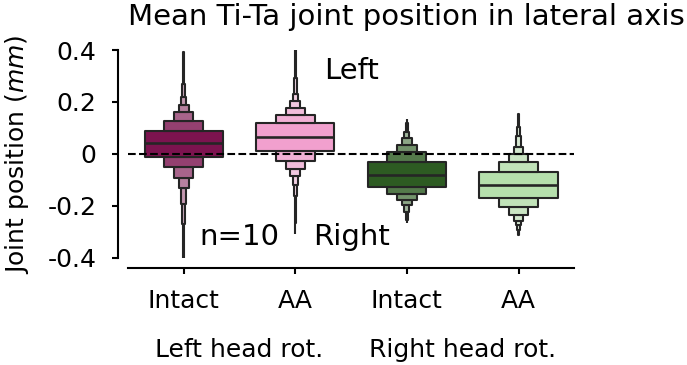

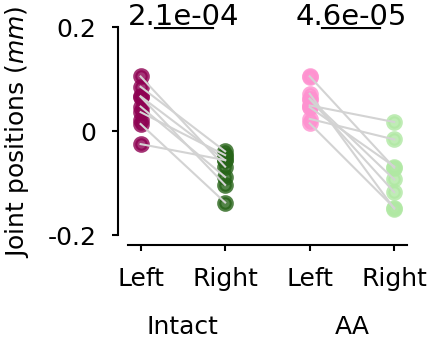

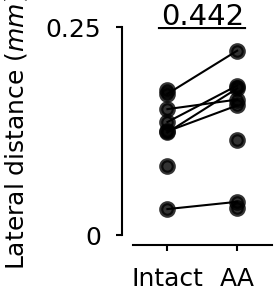

In [27]:
color_behaviors = {
    "Intact L": "#8e0152",
    "AA L": "#fe92d0",
    # 'space0': '#FFFFFF',
    "Intact R": "#276419",
    "AA R": "#b0e8a3",
}

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(
        1, 1, figsize=(FIGSIZE["width"] * 1.6, FIGSIZE["length"] * 1.0), dpi=300
    )

    sns.boxenplot(
        ax=ax,
        x="label",
        y="lateral_pos",
        data=df_panel_i,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )

    # horizontal line
    ax.axhline(0, color="black", linestyle="--", lw=0.5)

    # label right and grey shaded area
    ax.text(
        0.5,
        0.1,
        "Right",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        0.9,
        "Left",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    ax.set_xticks(
        rotation=0,
        ticks=[0, 1, 2, 3],
        labels=["Intact", "AA", "Intact", "AA"],
        minor=False,
    )
    ax.set_xticks(
        rotation=0,
        ticks=[0.5, 2.5],
        labels=["\n\nLeft head rot.", "\n\nRight head rot."],
        minor=True,
    )
    # at 0.5 and 2.5 put two labels
    ax.set_ylim(-0.4, 0.4)
    ax.set_yticks(
        rotation=0, ticks=[-0.4, -0.2, 0, 0.2, 0.4], labels=[-0.4, -0.2, 0, 0.2, 0.4]
    )
    plt.tick_params(axis="both", which="minor", length=0)
    ax.set_ylabel("Joint position ($mm$)")
    ax.set_xlabel("")

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis
    ax.set_xlim(-0.5, 3.5)
    plt.title("Mean Ti-Ta joint position in lateral axis", loc="left")
    # lets put some text
    ax.text(
        0.25,
        0.1,
        "n=10",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    fig.savefig(EXPORT_PATH / "Fig3_panelI_i.png", bbox_inches="tight")
    plt.show()

# compare intact right and left
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 1.0, FIGSIZE["length"] * 1.))
    # plot fly comparison
    for j, lateral_pos in enumerate(
        fly_data_panel_i["intact"]["lateral_pos_ant_r"]
    ):
        ax.scatter(
            0,
            fly_data_panel_i["intact"]["lateral_pos_ant_l"][j],
            c=color_behaviors["Intact L"],
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            fly_data_panel_i["intact"]["lateral_pos_ant_r"][j],
            c=color_behaviors["Intact R"],
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1],
            [
                fly_data_panel_i["intact"]["lateral_pos_ant_l"][j],
                fly_data_panel_i["intact"]["lateral_pos_ant_r"][j],
            ],
            c="lightgrey",
            alpha=1,
        )

    p_value_intact = scipy.stats.mannwhitneyu(
        [
            x
            for x in fly_data_panel_i["intact"]["lateral_pos_ant_l"]
            if not np.isnan(x)
        ],
        [
            x
            for x in fly_data_panel_i["intact"]["lateral_pos_ant_r"]
            if not np.isnan(x)
        ],
        alternative="greater",
    )
    diff_intact = [
        x - y
        if not np.isnan(x) and not np.isnan(y)
        else np.nan
        for x, y in zip(
            fly_data_panel_i["intact"]["lateral_pos_ant_l"],
            fly_data_panel_i["intact"]["lateral_pos_ant_r"],
        )
    ]

    # draw a horizontal line between 0 and 1
    ax.axhline(y=0.2, xmin=0.1, xmax=0.3, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.2,
        1.05,
        f"{p_value_intact.pvalue:.1e}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    # plot fly comparison for rla case
    for j, lateral_pos in enumerate(
        fly_data_panel_i["ant_amp"]["lateral_pos_ant_l"]
    ):
        ax.scatter(
            2,
            fly_data_panel_i["ant_amp"]["lateral_pos_ant_l"][j],
            c=color_behaviors["AA L"],
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            3,
            fly_data_panel_i["ant_amp"]["lateral_pos_ant_r"][j],
            c=color_behaviors["AA R"],
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [2, 3],
            [
                fly_data_panel_i["ant_amp"]["lateral_pos_ant_l"][j],
                fly_data_panel_i["ant_amp"]["lateral_pos_ant_r"][j],
            ],
            c="lightgrey",
            alpha=1,
        )
    p_value_rla = scipy.stats.mannwhitneyu(
        [
            x
            for x in fly_data_panel_i["ant_amp"]["lateral_pos_ant_l"]
            if not np.isnan(x)
        ],
        [
            x
            for x in fly_data_panel_i["ant_amp"]["lateral_pos_ant_r"]
            if not np.isnan(x)
        ],
        alternative="greater",
    )
    diff_rla = [
        x - y
        if not np.isnan(x) and not np.isnan(y)
        else np.nan
        for x, y in zip(
            fly_data_panel_i["ant_amp"]["lateral_pos_ant_l"],
            fly_data_panel_i["ant_amp"]["lateral_pos_ant_r"],
        )
    ]

    # draw a horizontal line between 0 and 1
    ax.axhline(y=0.2, xmin=0.7, xmax=0.9, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.8,
        1.05,
        f"{p_value_rla.pvalue:.1e}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    ax.set_xticks([0, 1, 2, 3], ["Left", "Right", "Left", "Right"], minor=False)
    ax.set_xticks(
        rotation=0,
        ticks=[0.5, 2.5],
        labels=["\n\nIntact", "\n\nAA"],
        minor=True,
    )
    # dont show minor ticks
    plt.tick_params(axis="both", which="minor", length=0)
    # plt.xlim([-0.5, 1.5])
    plt.yticks([-0.2, 0, 0.2], [-0.2, 0, 0.2])
    plt.ylim([-0.2, 0.2])

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis

    # plt.title(f"{p_value.pvalue:.1e}")
    plt.ylabel("Joint positions ($mm$)")
    fig.savefig(EXPORT_PATH / "Fig3_panelI_ii_flycomp.png", bbox_inches="tight")

    plt.show()

# compare rla right and left
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 0.5, FIGSIZE["length"] * 1.))
    # plot fly comparison
    for j, (lateral_pos_int, lateral_pos_rla) in enumerate(
        zip(diff_intact, diff_rla)
    ):
        ax.scatter(
            0,
            lateral_pos_int,
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            lateral_pos_rla,
            c="black",
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1],
            [
                lateral_pos_int,
                lateral_pos_rla,
            ],
            c="black",
            alpha=1,
        )

    plt.xticks([0, 1], ["Intact", "AA"])
    plt.xlim([-0.5, 1.5])
    plt.yticks([0, 0.25], [0, 0.25])
    plt.ylim([0, 0.25])

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis
    p_value = scipy.stats.mannwhitneyu(
        [
            x
            for x in diff_intact
            if not np.isnan(x)
        ],
        [
            x
            for x in diff_rla
            if not np.isnan(x)
        ],
        alternative="two-sided",
    )

    # draw a horizontal line between 0 and 1
    ax.axhline(y=0.25, xmin=0.2, xmax=0.8, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.5,
        1.05,
        f"{p_value.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    plt.ylabel("Lateral distance ($mm$)")
    fig.savefig(EXPORT_PATH / "Fig3_panelI_iii_flycomp.png", bbox_inches="tight")

    plt.show()

## Panel K: analysis of foreleg-amputation and head-fixed data. 

We look at the antennal pitch movements in each case. 

In [28]:
head_fixed_fleg_ampu_df = load_data(DATA_PATH / "Fig3_kinematics_head_fixed_foreleg_ampu.pkl")

In [30]:
intact_chunks, exp_chunks, exp_chunks2 = prepare_data.prepare_data_panel_k(head_fixed_fleg_ampu_df)

df_panel_k = prepare_data.boxen_panel_k(intact_chunks, exp_chunks, exp_chunks2)
fly_data_panel_k = prepare_data.scatter_panel_k(intact_chunks, exp_chunks, exp_chunks2)

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97074/233075541.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


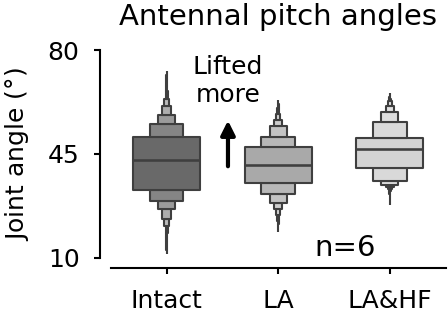

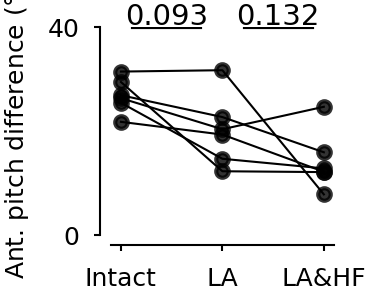

In [31]:
color_behaviors = {
    "Intact": "dimgrey",
    "RLF": "darkgrey",
    "HF&RLF": "lightgrey",
}

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(
        1, 1, figsize=(FIGSIZE["width"] * 1.2, FIGSIZE["length"] * 1.0), dpi=300
    )

    sns.boxenplot(
        ax=ax,
        x="label",
        y="antenna_pitch",
        data=df_panel_k,
        showfliers=False,
        palette=color_behaviors,
        width=0.6,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )

    ax.set_title("Antennal pitch angles")

    ax.set_ylim(10, 70)

    ax.set_xticks(
        rotation=0,
        ticks=[0, 1, 2],
        labels=["Intact", "LA", "LA&HF"],
        minor=False,
    )
    ax.set_yticks(
        rotation=0,
        ticks=[10, 45, 80],
        labels=[10, 45, 80],
        minor=False,
    )
    ax.set_xlabel("")
    ax.set_ylabel("Joint angle ($\degree$)")

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis
    ax.set_xlim(-0.5, 2.5)
    # add upward arrow
    ax.annotate(
        "",
        xy=(0.35, 0.4),
        xytext=(0.35, 0.7),
        # arrow head is closed
        arrowprops=dict(arrowstyle="<|-", lw=1, color="black"),
        xycoords="axes fraction",
    )
    # add text at the end of the arrow
    ax.text(
        0.35,
        0.85,
        "Lifted\nmore",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=6,
    )
    ax.text(
        0.7,
        0.05,
        "n=6",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    fig.savefig(EXPORT_PATH / "Fig3_panelK_i.png", bbox_inches="tight")
    plt.show()

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 0.8, FIGSIZE["length"] * 1.0))

    for j, antenna_pitch in enumerate(fly_data_panel_k["intact"]["antenna_pitch"]):
        ax.scatter(
            0,
            fly_data_panel_k["intact"]["antenna_pitch"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            fly_data_panel_k["rlf"]["antenna_pitch"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            2,
            fly_data_panel_k["hf_rlf"]["antenna_pitch"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1, 2],
            [
                fly_data_panel_k["intact"]["antenna_pitch"][j],
                fly_data_panel_k["rlf"]["antenna_pitch"][j],
                fly_data_panel_k["hf_rlf"]["antenna_pitch"][j],
            ],
            c="black",
            alpha=1,
        )

    ax.set_xticks(
        rotation=0,
        ticks=[0, 1, 2],
        labels=["Intact", "LA", "LA&HF"],
        minor=False,
    )
    ax.set_yticks(
        rotation=0,
        ticks=[0, 40],
        labels=[0, 40],
        minor=False,
    )
    ax.set_ylim(0, 40)

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis

    p_value_left = scipy.stats.mannwhitneyu(
        [x for x in fly_data_panel_k["intact"]["antenna_pitch"] if not np.isnan(x)],
        [x for x in fly_data_panel_k["rlf"]["antenna_pitch"] if not np.isnan(x)],
        alternative="two-sided",
    )
    p_value_right = scipy.stats.mannwhitneyu(
        [x for x in fly_data_panel_k["rlf"]["antenna_pitch"] if not np.isnan(x)],
        [x for x in fly_data_panel_k["hf_rlf"]["antenna_pitch"] if not np.isnan(x)],
        alternative="two-sided",
    )
    # draw a horizontal line between 0 and 1
    ax.axhline(y=40, xmin=0.1, xmax=0.4, c="black", lw=1)
    ax.axhline(y=40, xmin=0.6, xmax=0.9, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.25,
        1.05,
        f"{p_value_left.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.75,
        1.05,
        f"{p_value_right.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    plt.ylabel("Ant. pitch difference ($\degree$)")
    fig.savefig(EXPORT_PATH / "Fig3_panelK_ii_fly_comp.png", bbox_inches="tight")

    plt.show()

# Panel L: analysis of antennal and foreleg-amputation data.

We look at the head rotation movements in each case.

In [32]:
fleg_amp_anten_ampu_df = load_data(DATA_PATH / "Fig3_kinematics_foreleg_ampu_anten_ampu.pkl")

In [33]:
intact_chunks, exp_chunks, exp_chunks2 = prepare_data.prepare_data_panel_l(fleg_amp_anten_ampu_df)

df_panel_l = prepare_data.boxen_panel_l(intact_chunks, exp_chunks, exp_chunks2)
fly_data_panel_l = prepare_data.scatter_panel_l(intact_chunks, exp_chunks, exp_chunks2)

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97074/1506983689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


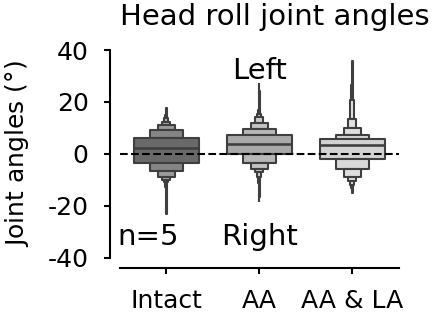

0
1
2
3
4


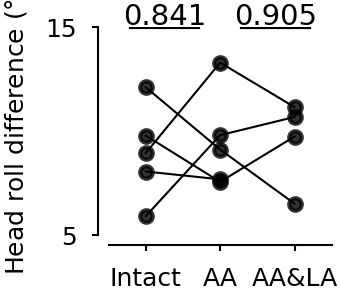

In [34]:
color_behaviors = {
    "Intact": "dimgrey",
    "AA": "darkgrey",
    "AA&LA": "lightgrey",
}

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(
        1, 1, figsize=(FIGSIZE["width"] * 1.0, FIGSIZE["length"] * 1.0), dpi=300
    )

    sns.boxenplot(
        ax=ax,
        x="label",
        y="head_roll",
        data=df_panel_l,
        showfliers=False,
        palette=color_behaviors,
        width=0.7,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )

    # # horizontal line
    ax.axhline(0, color="black", linestyle="--", lw=0.5)

    # label right and grey shaded area
    ax.text(
        0.5,
        0.9,
        "Left",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        0.1,
        "Right",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    ax.set_xticks(
        rotation=0,
        ticks=[0, 1, 2],
        labels=["Intact", "AA", "AA & LA"],
        minor=False,
    )
    ax.set_ylim(-40, 40)
    plt.tick_params(axis="both", which="minor", length=0)
    ax.set_ylabel("Joint angles ($\degree$)")
    ax.set_xlabel("")

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis
    ax.set_xlim(-0.5, 2.5)
    ax.set_yticks(rotation=0, ticks=[-40, -20, 0, 20, 40], labels=[40, 20, 0, -20, -40])
    ax.invert_yaxis()
    plt.title("Head roll joint angles", loc="left")
    ax.text(
        0.1,
        0.1,
        "n=5",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    fig.savefig(EXPORT_PATH / "Fig3_panelM_i.png", bbox_inches="tight")
    plt.show()

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 0.8, FIGSIZE["length"] * 1.0))
    # plot fly comparison
    for j, head_roll in enumerate(fly_data_panel_l["intact"]["head_roll"]):
        print(j)
        ax.scatter(
            0,
            fly_data_panel_l["intact"]["head_roll"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            fly_data_panel_l["rla"]["head_roll"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            2,
            fly_data_panel_l["rla_rlf"]["head_roll"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1, 2],
            [
                fly_data_panel_l["intact"]["head_roll"][j],
                fly_data_panel_l["rla"]["head_roll"][j],
                fly_data_panel_l["rla_rlf"]["head_roll"][j],
            ],
            c="black",
            alpha=1,
        )

    plt.xticks([0, 1, 2], ["Intact", "AA", "AA&LA"])
    plt.xlim([-0.5, 2.5])
    plt.yticks([5,15], [5,15])
    plt.ylim([5,15])

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis

    p_value_left = scipy.stats.mannwhitneyu(
        [x for x in fly_data_panel_l["intact"]["head_roll"] if not np.isnan(x)],
        [x for x in fly_data_panel_l["rla"]["head_roll"] if not np.isnan(x)],
        alternative="two-sided",
    )
    p_value_right = scipy.stats.mannwhitneyu(
        [x for x in fly_data_panel_l["rla"]["head_roll"] if not np.isnan(x)],
        [x for x in fly_data_panel_l["rla_rlf"]["head_roll"] if not np.isnan(x)],
        alternative="two-sided",
    )
    # draw a horizontal line between 0 and 1
    ax.axhline(y=15, xmin=0.1, xmax=0.4, c="black", lw=1)
    ax.axhline(y=15, xmin=0.6, xmax=0.9, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.25,
        1.05,
        f"{p_value_left.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.75,
        1.05,
        f"{p_value_right.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    plt.ylabel("Head roll difference ($\degree$)")
    fig.savefig(EXPORT_PATH / "Fig3_panelM_ii_fly_comp.png", bbox_inches="tight")

    plt.show()

# Panel M: analysis of antennal-amputation and head-fixed data.

We look at the lateral foreleg position in each case.

In [35]:
ant_ampu_head_fixed_df = load_data(DATA_PATH / "Fig3_kinematics_anten_ampu_head_fixed.pkl")

In [36]:
intact_chunks, exp_chunks, exp_chunks2 = prepare_data.prepare_data_panel_n(ant_ampu_head_fixed_df)

df_panel_n = prepare_data.boxen_panel_n(intact_chunks, exp_chunks, exp_chunks2)
fly_data_panel_n = prepare_data.scatter_panel_n(intact_chunks, exp_chunks, exp_chunks2)

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97074/383316901.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


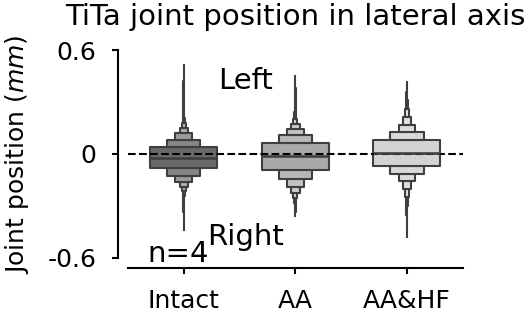

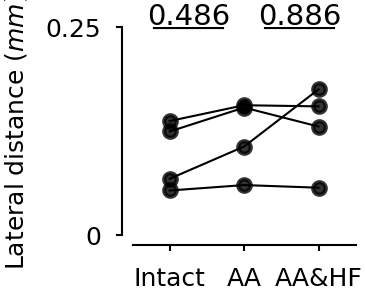

In [37]:
color_behaviors = {
    "Intact": "dimgrey",
    "AA": "darkgrey",
    "AA&HF": "lightgrey",
}

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(
        1, 1, figsize=(FIGSIZE["width"] * 1.2, FIGSIZE["length"] * 1.0), dpi=300
    )

    ax.axhline(0, color="black", linestyle="--", lw=0.5)

    sns.boxenplot(
        ax=ax,
        x="label",
        y="tita",
        data=df_panel_n,
        showfliers=False,
        palette=color_behaviors,
        width=0.6,
        order=list(color_behaviors.keys()),
        linewidth=0.5,
    )

    ax.set_title("TiTa joint position in lateral axis")

    ax.set_ylim(-0.4, 0.4)

    # label right and grey shaded area
    ax.text(
        0.35,
        0.1,
        "Right",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.35,
        0.85,
        "Left",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.15,
        0.02,
        "n=4",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.set_xticks(
        rotation=0,
        ticks=[0, 1, 2],
        labels=["Intact", "AA", "AA&HF"],
        minor=False,
    )
    ax.set_yticks(
        rotation=0,
        ticks=[-0.6, 0, 0.6],
        labels=[-0.6, 0, 0.6],
        minor=False,
    )

    ax.set_xlabel("")
    ax.set_ylabel("Joint position ($mm$)")

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis

    fig.savefig(EXPORT_PATH / "Fig3_panelO_i.png", bbox_inches="tight")
    plt.show()


with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 0.8, FIGSIZE["length"] * 1.0))
    # plot fly comparison
    for j, tita in enumerate(fly_data_panel_n["intact"]["tita"]):
        ax.scatter(
            0,
            fly_data_panel_n["intact"]["tita"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            1,
            fly_data_panel_n["rla"]["tita"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )
        ax.scatter(
            2,
            fly_data_panel_n["rla_hf"]["tita"][j],
            c="black",
            alpha=0.8,
            marker="o",
        )

        ax.plot(
            [0, 1, 2],
            [
                fly_data_panel_n["intact"]["tita"][j],
                fly_data_panel_n["rla"]["tita"][j],
                fly_data_panel_n["rla_hf"]["tita"][j],
            ],
            c="black",
            alpha=1,
        )

    plt.xticks([0, 1, 2], ["Intact", "AA", "AA&HF"])
    plt.xlim([-0.5, 2.5])
    plt.yticks([0, 0.25], [0, 0.25])
    plt.ylim([0, 0.25])

    ax.spines["left"].set_position(("outward", 2.5))  # 10 points outward for y-axis
    ax.spines["bottom"].set_position(("outward", 2.5))  # 10 points outward for x-axis

    p_value_left = scipy.stats.mannwhitneyu(
        [x for x in fly_data_panel_n["intact"]["tita"] if not np.isnan(x)],
        [x for x in fly_data_panel_n["rla"]["tita"] if not np.isnan(x)],
        alternative="two-sided",
    )
    p_value_right = scipy.stats.mannwhitneyu(
        [x for x in fly_data_panel_n["rla"]["tita"] if not np.isnan(x)],
        [x for x in fly_data_panel_n["rla_hf"]["tita"] if not np.isnan(x)],
        alternative="two-sided",
    )
    # draw a horizontal line between 0 and 1
    ax.axhline(y=0.25, xmin=0.1, xmax=0.4, c="black", lw=1)
    ax.axhline(y=0.25, xmin=0.6, xmax=0.9, c="black", lw=1)
    # put the p value on top of the line
    ax.text(
        0.25,
        1.05,
        f"{p_value_left.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.75,
        1.05,
        f"{p_value_right.pvalue:.3f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )

    plt.ylabel("Lateral distance ($mm$)")
    fig.savefig(EXPORT_PATH / "Fig3_panelO_ii_fly_comp.png", bbox_inches="tight")
    plt.show()